## question 3
#### Part:- 1
Train on MNIST dataset using an MLP. The original training dataset contains 60,000 images and test contains 10,000 images. If you are short on compute, use a stratified subset of a smaller number of images. But, the test set remains the same 10,000 images. Compare against RF and Logistic Regression models.  The metrics can be: F1-score, confusion matrix. What do you observe? What all digits are commonly confused? 


In [158]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input , Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.manifold import TSNE


#### - MNIST data loading and Standardization

In [160]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Standardize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print("Data is shuffled.")

Data is shuffled.


#### - Plotting some images of MNIST Dataset 

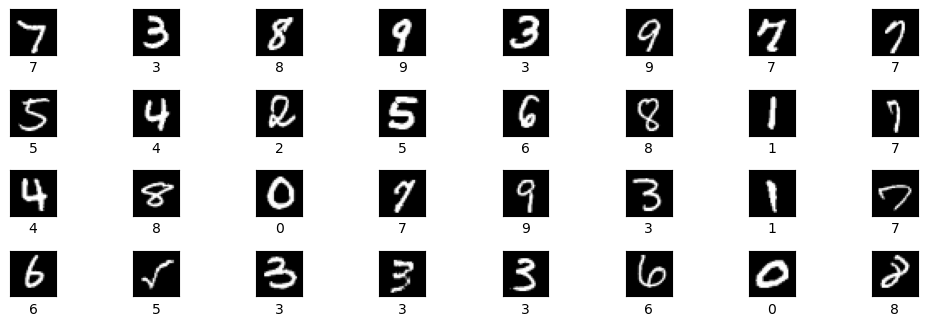

In [162]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10 , 8))
for i in range(32):
    ax = fig.add_subplot(10 , 8 , i+1)
    ax.imshow(X_train[i] , cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_train[i])
plt.tight_layout()
plt.show()

#### - MLP Model train on MNIST data and Evaluate 

In [164]:
# Define the MLP model with 30-20-10 structure
inputs = Input(shape=(28, 28))  # Assuming input shape of 28x28 for MNIST-like data
x = Flatten()(inputs)
x = Dense(128, activation='relu', name="first_layer")(x)
x = Dense(32, activation='relu', name="second_layer")(x)
outputs = Dense(10, activation='softmax')(x)

# Define and compile the trained model
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10)

# Evaluate MLP
mlp_pred = np.argmax(model.predict(X_test), axis=-1)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
mlp_confusion = confusion_matrix(y_test, mlp_pred)

model.summary()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8367 - loss: 0.5612 - val_accuracy: 0.9462 - val_loss: 0.1817
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1503 - val_accuracy: 0.9608 - val_loss: 0.1293
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0985 - val_accuracy: 0.9623 - val_loss: 0.1235
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0760 - val_accuracy: 0.9693 - val_loss: 0.1009
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9715 - val_loss: 0.0948
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0436 - val_accuracy: 0.9709 - val_loss: 0.0973
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9712 - val_loss: 0.1022
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0291 - val_accuracy: 0.

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 314,816 (1.20 MB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 209,878 (819.84 KB)

#### - Reshape data for Random Forest and Logistic Regression

In [166]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
X_train_flat = X_train_flat[:30000 ,:]
X_test_flat = X_test_flat[:30000 ,:]
y_for_trained = y_train[:30000] 


#### - Train Random Forest and LogisticRegression


In [168]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train_flat, y_for_trained)

# Evaluate RF
rf_pred = rf_model.predict(X_test_flat)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_confusion = confusion_matrix(y_test, rf_pred)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_for_trained)

# Evaluate LR
lr_pred = lr_model.predict(X_test_flat)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_confusion = confusion_matrix(y_test, lr_pred)

#### - Print F1 Scores 

In [170]:
print("MLP F1 Score:", mlp_f1)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression F1 Score:", lr_f1)

MLP F1 Score: 0.9770031642063115
Random Forest F1 Score: 0.9606623923659701
Logistic Regression F1 Score: 0.9182296406795419


#### - Plot confusion matrix 

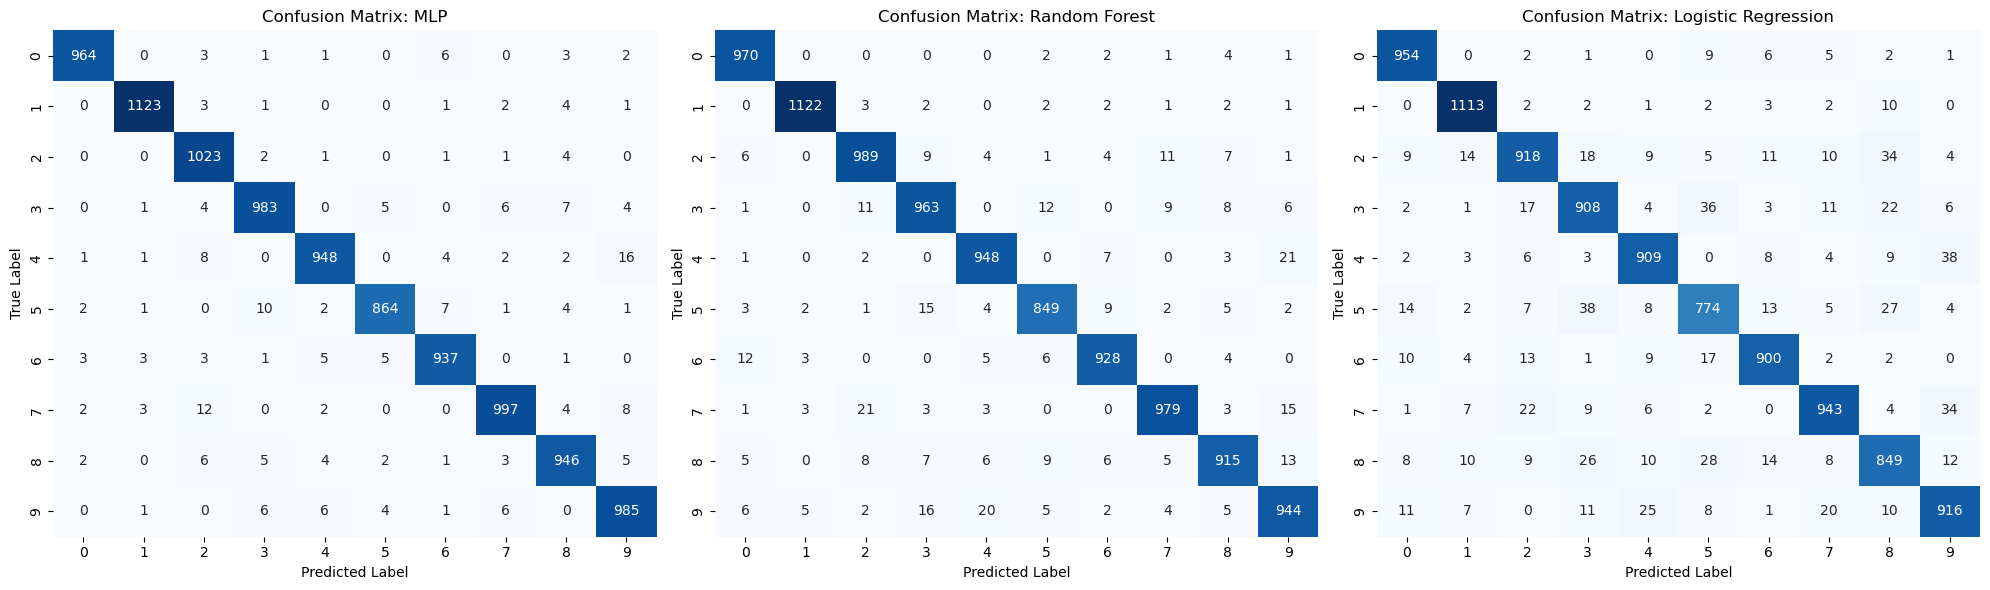

In [172]:
def plot_confusion_matrix(confusion_matrix, model_name, subplot_index):
    plt.subplot(1, 3, subplot_index)  # Create a 1x3 grid and select the subplot index
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Plotting confusion matrices side by side
plt.figure(figsize=(20, 6)) 
plot_confusion_matrix(mlp_confusion, "MLP", 1)
plot_confusion_matrix(rf_confusion, "Random Forest", 2)
plot_confusion_matrix(lr_confusion, "Logistic Regression", 3)
plt.tight_layout()
plt.show()


### Observations:
- The Multi-Layer Perceptron (MLP) achieves the highest accuracy, followed by the Random Forest Classifier, with Logistic Regression having the lowest accuracy among the three models.
- This order is consistent for the F1-score as well.
- Additionally, all models classify the digit 1 with the highest accuracy
- Confused Digits: Analyze confusion matrices for digits like '3' and '5' or '4' and '9', '5' and '8'  etc  which are visually similar.


### Part B

- Let us assume your MLP has 30 neurons in first layer, 20 in second layer and then 10 finally for the output layer (corresponding to 10 classes). On the trained MLP, plot the t-SNE for the output from the layer containing 20 neurons for the 10 digits. Contrast this with the t-SNE for the same layer but for an untrained model. What do you conclude? 

#### -  Create a model that outputs from the second layer & apply t-SNE 

In [176]:

untrained_inputs = Input(shape=(28, 28))
x_untrained = Flatten()(untrained_inputs)
x_untrained = Dense(30, activation='relu', name="first_layer_untrained")(x_untrained)
x_untrained = Dense(20, activation='relu', name="second_layer_untrained")(x_untrained)
outputs_untrained = Dense(10, activation='softmax')(x_untrained)
untrained_model = Model(inputs=untrained_inputs, outputs=outputs_untrained)

# Extract the intermediate outputs from the second layer (20 neurons) of both models
second_layer_model = Model(inputs=model.input, outputs=model.get_layer("second_layer").output)
second_layer_untrained_model = Model(inputs=untrained_model.input, outputs=untrained_model.get_layer("second_layer_untrained").output)

# Get activations for t-SNE
activations_trained = second_layer_model.predict(X_test)
activations_untrained = second_layer_untrained_model.predict(X_test)

# Apply t-SNE for dimensionality reduction
tsne_trained = TSNE(n_components=2, random_state=42).fit_transform(activations_trained)
tsne_untrained = TSNE(n_components=2, random_state=42).fit_transform(activations_untrained)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


#### - Plot t-SNE of MLP Second Layer Outputs [ for Trained and Untrained model ]

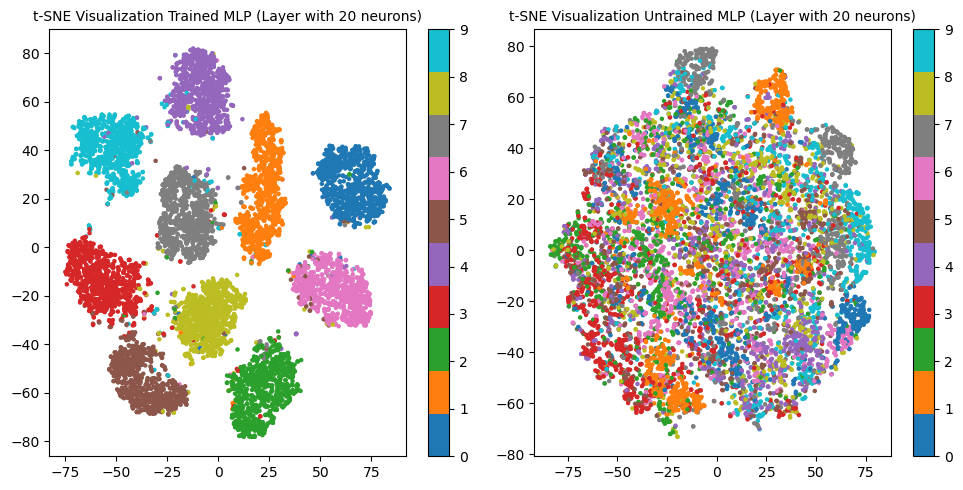

In [178]:
# Plotting the t-SNE for trained and untrained models
plt.figure(figsize=(10, 5))

# Plot for trained model
plt.subplot(1, 2, 1)
plt.scatter(tsne_trained[:, 0], tsne_trained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization Trained MLP (Layer with 20 neurons)" , fontsize = 10)

# Plot for untrained model
plt.subplot(1, 2, 2)
plt.scatter(tsne_untrained[:, 0], tsne_untrained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization Untrained MLP (Layer with 20 neurons)" , fontsize = 10)
plt.tight_layout()
plt.show()

#### Conclusion
* By examining the t-SNE plots for both the trained and untrained models, we observe that the trained model has successfully learned to distinguish between the different digit classes, resulting in distinct clusters. This indicates that the model has effectively learned to recognize the digits. Additionally, clusters of visually similar digits are positioned closer to each other, suggesting that the model has captured the underlying semantic relationships between these digits.

#### Part 3 
Now, use the trained MLP to predict on the Fashion-MNIST dataset. What do you observe? How do the embeddings (t-SNE viz for the second layer compare for MNIST and Fashion-MNIST images)

#### - Load and Standardize the Fashion-MNIST dataset

In [182]:
# Load Fashion-MNIST dataset
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = keras.datasets.fashion_mnist.load_data()

# Standardize the dataset
X_fashion_train = X_fashion_train/255.0
X_fashion_test = X_fashion_test/255.0

#### - Plotting some images of F-MNIST Dataset 

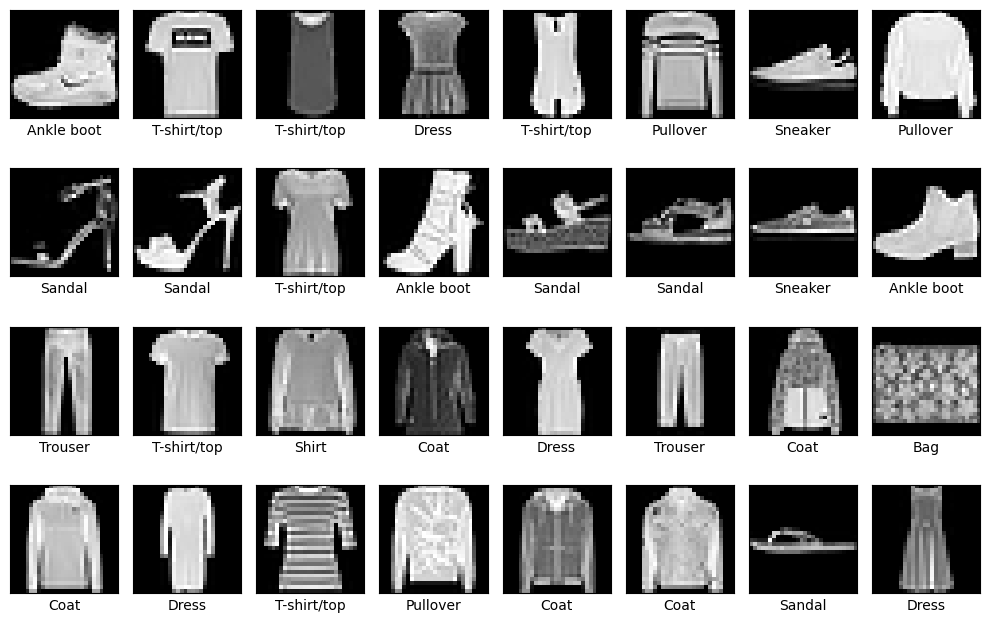

In [184]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

fig = plt.figure(figsize =(10 , 8))
for i in range(32):
    ax = fig.add_subplot(5 , 8 , i+1)
    ax.imshow(X_fashion_train[i] , cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(fashion_labels[y_fashion_train[i]])
plt.tight_layout()
plt.show()

#### - Predict using trained MLP and apply t- SNE to the outputs of F-MNIST datasets


In [186]:
# Predict using the trained MLP
fashion_predictions = np.argmax(model.predict(X_fashion_test), axis=-1)
fashion_f1 = f1_score(y_fashion_test, fashion_predictions, average='weighted')
fashion_confusion = confusion_matrix(y_fashion_test, fashion_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


#### -  F-Score for predicting F-MNIST data using trined MLP model on MNIST data

In [188]:
print(f'F1-Score for F-MNIST data = {fashion_f1}')

F1-Score for F-MNIST data = 0.05556560014311176


#### - Plot Confusion Matrix

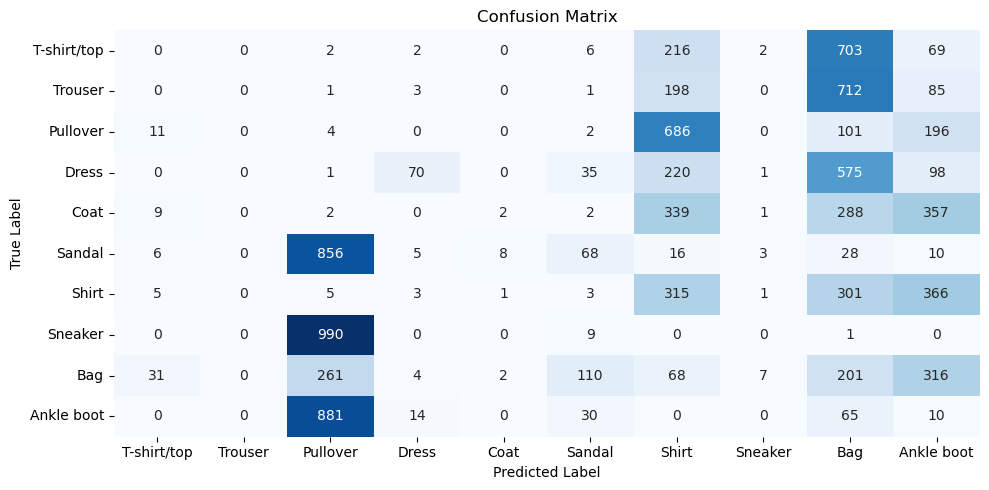

In [190]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (10, 5))
sns.heatmap(fashion_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=fashion_labels, yticklabels=fashion_labels)
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### - Apply t-SNE on the the F-MNIST data and compare with t-SNE for MNIST data

In [ ]:
activations_trained = second_layer_model.predict(X_fashion_test)

tsne_fashion_trained = TSNE(n_components=2, random_state=42).fit_transform(activations_trained)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


#### -  Plot the t-SNE results for Fashion-MNIST and MNIST

In [ ]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(15, 6))

# Plot for trained model
plt.subplot(1, 2, 1)
plt.scatter(tsne_fashion_trained[:, 0], tsne_fashion_trained[:, 1], c=y_test, cmap='tab10', s=5)
cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(fashion_labels) 
plt.title("t-SNE Visualization - Trained MLP (Layer with 20 neurons) for F-MNIST data " , fontsize = 11)

# Plot for trained model
plt.subplot(1, 2, 2)
plt.scatter(tsne_trained[:, 0], tsne_trained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization - Trained MLP (Layer with 20 neurons) for MNIST data" , fontsize = 11)

plt.tight_layout()
plt.show()

#### Observations

- The accuracy and F1-Score of the model is very low. This is because the Fashion-MNIST Dataset contains images of fashion items like shoes, t-shirts etc. while the model is trained on MNIST dataset, which contains digits. Therefore, as the model has learned only on the digits, it is not not surprising that it will not be able to classify the fashion items incorrectly.

- From the t-SNE graph of the Fashion-MNIST, we can see that is is highly confused than the trained model. Though, it is seperated some things into some diffused clusters, which is evident from the confusion matrix also, it is not able to get a clear decision boundary for all the classes